In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [115]:
train = pd.read_excel("Training Dataset.xlsx")

In [98]:
train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [4]:
len(train)

64006

In [5]:
len(train[train['Total']>24])

18672

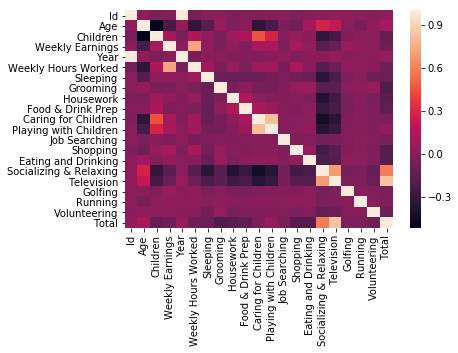

In [6]:
sns.heatmap(train[train['Total']>24].corr());

In [7]:
activities_corr = train[train['Total'] > 24].loc[:,'Weekly Hours Worked':'Volunteering'].corr()

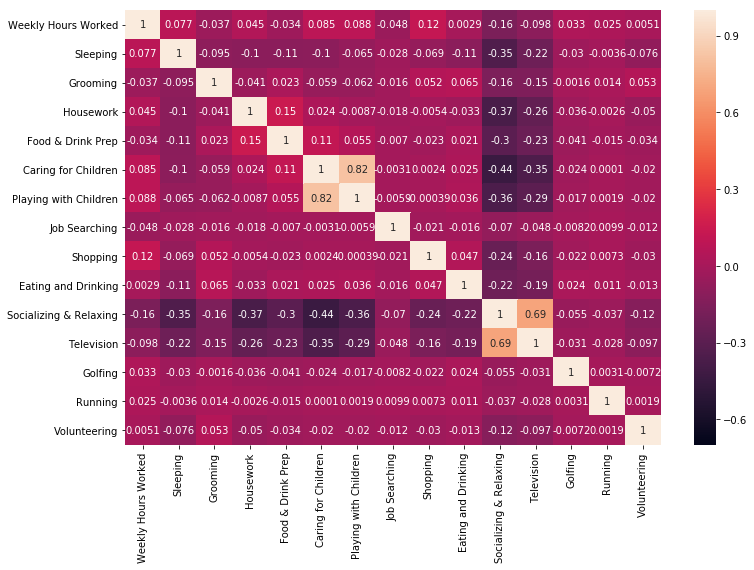

In [8]:
plt.pyplot.subplots(figsize=(12,8))
sns.heatmap(activities_corr, annot=True, annot_kws={'size':10}, vmin=-0.7);

In [9]:
for index, row in activities_corr.iterrows():
    for col in activities_corr.columns.values:
        if 0.5 < row[col] < 1 :
            print(row[col])
            print(row.name)
            print(col+'\n')

0.8190478136630778
Caring for Children
Playing with Children

0.8190478136630778
Playing with Children
Caring for Children

0.6885248284246341
Socializing & Relaxing
Television

0.6885248284246341
Television
Socializing & Relaxing



In [99]:
train.loc[:,'Caring for Children':'Playing with Children'].head()

,Caring for Children,Playing with Children
0,0,0
1,365,20
2,0,0
3,0,0
4,0,0


In [116]:
transformed_train = train

In [117]:
transformed_train['Caring for Children'] = transformed_train['Caring for Children']\
                                            -transformed_train['Playing with Children']

In [118]:
transformed_train.loc[:,'Caring for Children':'Playing with Children'].head()

,Caring for Children,Playing with Children
0,0,0
1,345,20
2,0,0
3,0,0
4,0,0


In [119]:
transformed_train.loc[:,'Socializing & Relaxing':'Television'].head()

,Socializing & Relaxing,Television
0,180,120
1,15,15
2,214,199
3,240,240
4,600,40


In [120]:
transformed_train['Socializing & Relaxing'] = transformed_train['Socializing & Relaxing'] - transformed_train['Television']

In [121]:
transformed_train.loc[:,'Socializing & Relaxing':'Television'].head()

,Socializing & Relaxing,Television
0,60,120
1,0,15
2,15,199
3,0,240
4,560,40


In [122]:
transformed_train.loc[:,'Total'][transformed_train['Total']>24].head()

3     26.833333
5     25.083333
14    26.416667
19    25.750000
20    25.166667
Name: Total, dtype: float64

In [123]:
transformed_train['Total'] = transformed_train['Total']\
                                -((transformed_train['Playing with Children']\
                                   +transformed_train['Television'])/60)

In [137]:
transformed_train['Total'].max()

24.000000003333337

In [93]:
# temp = train[train['Total']>24].head()
# temp.loc[:,'Total']

In [94]:
# temp['Total'] = temp['Total']-((temp['Playing with Children']+temp['Television'])/60)
# temp.loc[:,'Total']

In [140]:
transformed_train['Total'] = transformed_train['Total'].apply(lambda x: 24 if x > 24 else x)

In [141]:
transformed_train['Total'].max()

24.0

In [144]:
transformed_train.to_csv('transformed_Training Dataset.csv')